In [ ]:
from glob import glob
from os.path import join
import random
img_src = "PetImages\Cat"
# 指定パスのPNG画像ファイルのリストを取得
files = glob(join(img_src, "*.jpg"))
# ファイルの総数を取得
num_files = len(files)
# ファイルのリストを7:3に分ける
files30 = random.sample(files, int(num_files*0.3))
files70 = random.sample(files, num_files - int(num_files*0.3))

print(files30)


In [2]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.utils  import np_utils
import numpy as np


DATADIR = "D:/anaconda3/program_files/PetImages"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 50
training_data = []

def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)  # データをシャッフル

X_train = []  # 画像データ
y_train = []  # ラベル情報

# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)

# numpy配列に変換
X_train = np.array(X_train)
y_train = np.array(y_train)


# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'Dog' if y_train[i] == 0 else 'Cat')
    img_array = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)

plt.show()

# 0~255の整数範囲になっているため、0~1間に数値が収まるよう正規化
X_train = X_train.astype("float") / X_train.max()
# クラスラベルの正解値は1、他は0になるようワンホット表現を適用
y_train = np_utils.to_categorical(y_train,len(CATEGORIES))
#学習用と検証用のデータに分ける     テストデータは30％
X_traning, X_test, y_traning, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

#モデル学習関数
def model_train(X_traning,y_traning):
    
    #インスタンス
    model = Sequential()
    
    # 1層目 (畳み込み）
    model.add(Conv2D(32,(2,2),padding="same", input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    # 2層目（Max Pooling)
    model.add(Conv2D(32,(2,2)))
    model.add(Activation('relu'))
    # 3層目 (Max Pooling)
    model.add(MaxPooling2D(pool_size=(1,1)))                     
    model.add(Dropout(0.3))                     
    # 4層目 (畳み込み)
    model.add(Conv2D(64,(2,2),padding="same"))                   
    model.add(Activation('relu'))
    # 5層目 (畳み込み)
    model.add(Conv2D(64,(2,2))) 
    model.add(Activation('relu'))
    # 6層目 (Max Pooling)
    model.add(MaxPooling2D(pool_size=(1,1)))
    # データを1次元化
    model.add(Flatten())
    # 7層目 (全結合層)
    model.add(Dense(512))                                       
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    # 出力層(softmaxで0〜1の確率を返す)
    model.add(Dense(2)) 
    model.add(Activation('softmax'))
    # 最適化アルゴリズム
    opt = tensorflow.keras.optimizers.RMSprop(lr=0.005, decay=1e-6)
    # 損失関数
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"]
                 )
                  
    # モデル学習
    model.fit(X_train,y_train,batch_size=10,epochs=150)
    # モデルの結果を保存
    model.save(model_dir)
    return model
# 評価用関数
def evaluate(model,X_test,y_test):
    # モデル評価
    scores = model.evaluate(X_test,y_test,verbose=1)
    print("Test Loss: ", scores[0])
    print("test Accuracy: ", scores[1])

#モデル学習
model = model_train(X_traning,y_traning)    
#モデル評価
evaluate(model,X_test, y_test)

KeyboardInterrupt: 

学習データのラベル： 0
学習データのラベル： 1
学習データのラベル： 0
学習データのラベル： 1


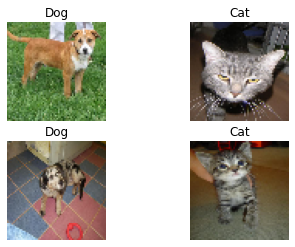

d:\anaconda3\envs\Tensorflow\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/60
891/891 [==============================] - 36s 31ms/step - loss: 0.6440 - accuracy: 0.6173
Epoch 2/60
891/891 [==============================] - 27s 30ms/step - loss: 0.5749 - accuracy: 0.7000
Epoch 3/60
891/891 [==============================] - 27s 30ms/step - loss: 0.5290 - accuracy: 0.7347
Epoch 4/60
891/891 [==============================] - 27s 31ms/step - loss: 0.4993 - accuracy: 0.7554
Epoch 5/60
891/891 [==============================] - 27s 30ms/step - loss: 0.4739 - accuracy: 0.7726
Epoch 6/60
891/891 [==============================] - 27s 30ms/step - loss: 0.4541 - accuracy: 0.7883
Epoch 7/60
891/891 [==============================] - 27s 30ms/step - loss: 0.4356 - accuracy: 0.7989
Epoch 8/60
891/891 [==============================] - 27s 30ms/step - loss: 0.4189 - accuracy: 0.8076
Epoch 9/60
891/891 [==============================] - 27s 30ms/step - loss: 0.4063 - accuracy: 0.8135
Epoch 10/60
891/891 [==============================] - 27s 30ms/step - loss: 0.393

In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.utils  import np_utils
import numpy as np


DATADIR = "D:/anaconda3/program_files/PetImages"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 64
training_data = []

folder = os.listdir("PetImages")
folder.pop(-1)
dense_size  = len(folder)

def create_training_data():
    for class_num, category in enumerate(CATEGORIES):
        path = os.path.join(DATADIR, category)
        for image_name in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, image_name),)  # 画像読み込み
                img_resize_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # 画像のリサイズ
                training_data.append([img_resize_array, class_num])  # 画像データ、ラベル情報を追加
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)  # データをシャッフル

X_train = []  # 画像データ
y_train = []  # ラベル情報

# データセット作成
for feature, label in training_data:
    X_train.append(feature)
    y_train.append(label)

# numpy配列に変換
X_train = np.array(X_train)
y_train = np.array(y_train)


# データセットの確認
for i in range(0, 4):
    print("学習データのラベル：", y_train[i])
    plt.subplot(2, 2, i+1)
    plt.axis('off')
    plt.title(label = 'Dog' if y_train[i] == 0 else 'Cat')
    img_array = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)

plt.show()

# 0~255の整数範囲になっているため、0~1間に数値が収まるよう正規化
X_train = X_train.astype("float") / 255
# クラスラベルの正解値は1、他は0になるようワンホット表現を適用
y_train = np_utils.to_categorical(y_train,len(CATEGORIES))
#学習用と検証用のデータに分ける     テストデータは30％
X_traning, X_test, y_traning, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

#モデル学習関数
def model_train(X_traning,y_traning):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # 最適化アルゴリズム
    opt = tensorflow.keras.optimizers.RMSprop(lr=0.00005, decay=1e-6)
    #損失関数
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"]
                 )
    # モデル学習
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.fit(X_train,y_train,batch_size=28,epochs=60,)         
    # モデルの結果を保存
    model.save('./model')
    return model

    # 評価用関数
def evaluate(model,X_test,y_test):
    # モデル評価
    scores = model.evaluate(X_test,y_test,verbose=1)
    print("Test Loss: ", scores[0])
    print("test Accuracy: ", scores[1])

#モデル学習
model = model_train(X_traning,y_traning)    
#モデル評価
evaluate(model,X_test, y_test)